<a href="https://colab.research.google.com/github/swatisingh9839/SML-session-9-features/blob/main/Copy_of_SML_session_9_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import sklearn.linear_model as skl_lm

from matplotlib.patches import Arc

import itertools
import math

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# 9.1 Analysing happiness across countries

In this exercise, we will consider the data set `data/happy.csv` with data from the World Happiness Report. For details see: https://worldhappiness.report/ed/2019/changing-world-happiness/

## Dataset

`GDP per capita` is in terms of Purchasing Power Parity (PPP) adjusted to constant 2011 international dollars, taken from the World Development Indicators (WDI) released by the World Bank on November 14, 2018. The equation uses the natural log of GDP per capita, as this form fits the data significantly better than GDP per capita.

The time series of `healthy life expectancy` at birth are constructed based on data from the World Health Organization (WHO) Global Health Observatory data repository, with data available for 2005, 2010, 2015, and 2016. To match this report’s sample period, interpolation and extrapolation are used. 

`Social support` is the national average of the binary responses (either 0 or 1) to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

`Freedom to make life choices` is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

`Generosity` is the residual of regressing the national average of GWP responses to the question “Have you donated money to a charity in the past month?” on GDP per capita.

`Perceptions of corruption` are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.

## a)

Load and familiarize yourself with the data set.

In [ ]:
# Read in the data
#happy = pd.read_csv("data/happy.csv",delimiter=';') 
happy = pd.read_csv('https://uu-sml.github.io/course-sml-public/data/happy.csv', delimiter=';')
happy.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,0.258195,0.612072,-1.929690
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,0.237092,0.611545,-2.044093
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,0.275324,0.299357,-1.991810
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,0.267175,0.307386,-1.919018
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,0.267919,0.435440,-1.842996


In [ ]:
# Rename some columns
happy.rename(columns = {
    'Perceptions of corruption':'Corruption',
    'Log GDP per capita': 'LogGDP',
    'Healthy life expectancy at birth': 'LifeExp',
    'Freedom to make life choices': 'Freedom',
}, inplace = True) 

# In this exercise we will just analyse one year. 2017.
df = happy[happy['Year'] == 2017].dropna()
df.head()

,Country name,Year,Life Ladder,LogGDP,Social support,LifeExp,Freedom,Generosity,Corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality
9,Afghanistan,2017,2.661718,7.497755,0.490880,52.799999,0.427011,-0.112198,0.954393,0.496349,0.371326,0.261179,-1.886566
20,Albania,2017,4.639548,9.376145,0.637698,68.400002,0.749611,-0.032643,0.876135,0.669241,0.333884,0.457738,0.299945
44,Argentina,2017,6.039330,9.848709,0.906699,68.599998,0.831966,-0.182600,0.841052,0.809423,0.291717,0.305430,0.351304
57,Armenia,2017,4.287736,9.081095,0.697925,66.599998,0.613697,-0.133958,0.864683,0.625014,0.437149,0.246901,-0.633139
69,Australia,2017,7.257038,10.706581,0.949958,73.300003,0.910550,0.308773,0.411347,0.780079,0.225361,0.453407,1.140084


## b)
The code below fits a linear regression model to predict life ladder (happiness) as a function of social support. Edit the code to fit a third order polynomial. What model would you suggest to use?

In [ ]:
#Fit model.
X_train = df[['Social support']]
y_train = df['Life Ladder']
model = skl_lm.LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

# Print the solution
print(f'The coefficient is: {model.coef_[0]:.3f}')

The coefficient is: 6.813


In [ ]:
#Compute predictions.
x = np.arange(0.25, 1, step=0.01)
X_test = x.reshape(-1, 1)
y_test = model.predict(X_test)

In [ ]:
#Fit model polynomial


In [ ]:
#Compute predictions.


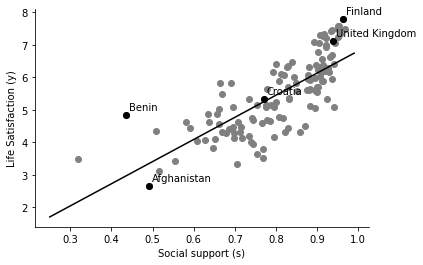

In [ ]:
# Plot social support and life ladder data
plt.plot('Social support', 'Life Ladder', 'o', data=df, color='gray')
countries = ['United Kingdom','Croatia', 'Benin', 'Finland',
             'Afghanistan']
for country in countries:
    ci = np.where(df['Country name'] == country)[0][0]
    plt.plot(df.iloc[ci]['Social support'],
             df.iloc[ci]['Life Ladder'], 'ko')
    plt.annotate(country,
                 xy=(df.iloc[ci]['Social support'],
                     df.iloc[ci]['Life Ladder']),
                 xytext=(3, 3),  # 3 points offset
                 textcoords="offset points",
                 ha='left', va='bottom')

# Plot model
plt.plot(x, y_test, 'k')
plt.ylabel('Life Satisfaction (y)')
plt.xlabel('Social support (s)')
plt.show()

## c)

The code below fits a linear regression model to predict life ladder (happiness) as a linear function of six variables. Use AIC as a manual tool to investigate what the best model is combining these factors.

The AIC of a model is defined as
$$
\mathrm{AIC} = 2 k - 2 \ell,
$$
where $k$ is the number of model parameters and $\ell$ is the maximum log-likelihood of the model. In the case of a linear regression model
$$
y = \theta_0 + \theta_1 x_1 + \cdots + \theta_p x_p + \epsilon, \qquad \epsilon \sim \mathcal{N}(0, \sigma^2)
$$
with intercept the number of parameters is $k = p + 2$ ($\theta_0, \ldots, \theta_p$ and $\sigma$). Without intercept,
the number of parameters would be $k = p + 1$ ($\theta_1, \ldots, \theta_p$ and $\sigma$).

In [ ]:
factors = ['LogGDP', 'Social support', 'LifeExp',  'Freedom',
           'Generosity', 'Corruption']

# Fit regression model
X = df[factors]
y = df['Life Ladder']
model = skl_lm.LinearRegression()
model.fit(X, y)

# Print the solution
print('The coefficients are:', model.coef_)
print(f'The offset is: {model.intercept_:.3f}')

# Compute predictions
y_hat = model.predict(X)

# Compute AIC
def aic(model, y, y_hat):
    # Numbers of parameters of linear regression model
    # Variance of Gaussian noise is a parameter as well!
    k = model.coef_.size + model.get_params()['fit_intercept'] + 1
    
    # Compute maximum log-likelihood
    n = y.size
    mse = np.mean((y - y_hat)**2)
    loglik = - n / 2 * (1 + math.log(2 * math.pi) + np.log(mse))
    
    return 2 * (k - loglik)

print(f'The AIC is: {aic(model, y, y_hat):.3f}')

The coefficients are: [ 0.24164398  2.9430804   0.03409291  1.50500137  0.40700498 -0.45686726]
The offset is: -2.151
The AIC is: 244.005


## d)

Write an automated code to find the model with the smallest AIC.

This can very likely be improved on.

# 9.2 Analysing goals in football

In this exercise, we will consider the data set `data/shots.csv`. This is a collection of all shots and goals in the English premier league for one season. See: https://figshare.com/articles/dataset/Events/7770599

## Data
'Goal' 1 if a goal, 0 if not a goal
'X' x-location along long side of pitch in co-ordinates (0-100)
'Y' y-location along short side of pitch (where goal is) in co-ordinates (0-100)
'Distance' is distance (in metres) from middle of goal.
'Angle' is of a triangle created fom the shot point to the goal mouth (as descibed in lectures).

In [ ]:
#Load data for all shots
#shots_model=pd.read_csv('data/shots.csv')
shots_model = pd.read_csv('https://uu-sml.github.io/course-sml-public/data/shots.csv')
shots_model.head()

Function for plotting goal mouth 

In [ ]:
def createGoalMouth():
    #Adopted from FC Python
    #Create figure
    plt.figure()
    ax = plt.gca()

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(leftPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    
    #Draw Arcs
    ax.add_patch(leftArc)
    
    #Set limits
    plt.xlim(-1,66)
    plt.ylim(-3,35)

    #Tidy Axes
    plt.axis('off')
    
    #Set layout
    plt.tight_layout()
    ax.set_aspect('equal', adjustable='box')

## a)
The code plot the frequency of the data. 

In [ ]:
# Compute a two-dimensional histogram of shots from different points
shotcounts, _, _ = np.histogram2d(shots_model['X'], shots_model['Y'],
                                  bins=50, range=[[0, 100],[0, 100]])

# Plot the number of shots from different points
createGoalMouth()
pos = plt.imshow(shotcounts, extent=[-1,66,104,-1], cmap=plt.cm.Reds)
plt.colorbar(pos)
plt.title('Number of shots')
plt.show()

In [ ]:
# Compute a two-dimensional histogram of goals from different points
goals_only = shots_model[shots_model['Goal'] == 1]
goalcounts, _, _ = np.histogram2d(goals_only['X'], goals_only['Y'],
                                  bins=50, range=[[0, 100],[0, 100]])

# Plot the number of goals from different points
createGoalMouth()
pos = plt.imshow(goalcounts, extent=[-1,66,104,-1], cmap=plt.cm.Reds)
plt.colorbar(pos)
plt.title('Number of goals')
plt.show()

In [ ]:
# Compute empirical probability of scoring from different points
with np.errstate(divide='ignore', invalid='ignore'):
    prob_goal = goalcounts / shotcounts

# Plot the probability of scoring from different points.
createGoalMouth()
pos = plt.imshow(prob_goal, extent=[-1,66,104,-1], cmap=plt.cm.Reds,
                 vmin=0, vmax=0.5)
plt.colorbar(pos)
plt.title('Proportion of shots resulting in a goal')
plt.show()

## b)
The code below plots how shot angle determine probability of scoring. It fits a logistic regression model and compares it to data. Make a similar plot for distance to goal. See what happens when you add distance squared.

In [ ]:
# Make single variable model of angle
# Using logistic regression we find the optimal parameters
X = shots_model[['Angle']]
y = shots_model['Goal']
model = skl_lm.LogisticRegression(penalty='none')
model.fit(X, y)

# Bin the angles of shots to compute empirical estimates of the
# probabilities of goals scored
shotcount_angle, bin_edges = np.histogram(shots_model['Angle'] * 180 / np.pi, bins=40, range=[0, 150])
goalcount_angle, _ = np.histogram(goals_only['Angle'] * 180 / np.pi, bins=40, range=[0, 150])

# Compute average angle in each bin
angle = (bin_edges[:-1] + bin_edges[1:])/2

# Empirical estimate of probabilities of goal scored
# for bins with at least one shot
ibins = np.where(shotcount_angle > 0)
prob_goal = goalcount_angle[ibins] / shotcount_angle[ibins]

# Compute predictions
xGprob = model.predict_proba(angle.reshape(-1, 1) * np.pi / 180) 

# Plot data and predictions
plt.plot(angle[ibins], prob_goal, 'ko')
plt.plot(angle, xGprob[:,1], 'k')
plt.xlabel("Shot angle (degrees)")
plt.ylabel('Probability chance scored')
plt.show()

In [ ]:
#Show empirically how distance from goal predicts probability of scoring
#Make single variable model of distance


In [ ]:
#Adding distance squared


## c)
By setting `model_variables` in the code below you can test different features. Investigate manually which parameters work best. 

In [ ]:
# Adding even more variables to the model.
shots_model['X2'] = shots_model['X']**2
shots_model['C2'] = shots_model['C']**2
shots_model['AX'] = shots_model['Angle']*shots_model['X']

# A general model for fitting goal probability
# List the model variables you want here
model_variables = ['Distance']

# Fit the linear regression model.
X = shots_model[model_variables]
y = shots_model['Goal']
model = skl_lm.LogisticRegression(penalty='none')
model.fit(X, y)

# Create a 2D map of predicted probabilities
pgoal_2d = np.zeros((65,65))
for x in range(65):
    for y in range(65):
        # Compute features for this field
        sh = dict()
        a = np.arctan(7.32 *x /(x**2 + abs(y-65/2)**2 - (7.32/2)**2))
        if a < 0:
            a = np.pi + a
        sh['Angle'] = a
        sh['Distance'] = np.sqrt(x**2 + abs(y-65/2)**2)
        sh['D2'] = x**2 + abs(y-65/2)**2
        sh['X'] = x
        sh['AX'] = x*a
        sh['X2'] = x**2
        sh['C'] = abs(y-65/2)
        sh['C2'] = (y-65/2)**2
        
        # Compute predictions
        X_field = np.array([sh[var] for var in model_variables]).reshape(-1, 1)
        pgoal_2d[x, y] = model.predict_proba(X_field)[:, 1]

# Plot model
createGoalMouth()
plt.imshow(pgoal_2d, extent=[-1,65,65,-1],
           cmap=plt.cm.Reds, vmin=0, vmax=0.3)
plt.colorbar(pos)
plt.title('Probability of goal')
plt.show()